# **Feature Engineering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")
warnings.filterwarnings('ignore', category=FutureWarning)

# Data Dictionary

| Variable             | Description                                                                                                  | Unit              |
|----------------------|--------------------------------------------------------------------------------------------------------------|-------------------|
| Year                 | The year in which the weather data was recorded.                                                             | Numeric           |
| Month                | The month in which the weather data was recorded.                                                            | Numeric (1-12)    |
| Day                  | The day of the month on which the weather data was recorded.                                                 | Numeric (1-31)    |
| Hour                 | The hour of the day at which the weather data was recorded.                                                   | Numeric (0-23)    |
| Dew Point            | The temperature to which air must be cooled to become saturated with water vapor.                            | Celsius (°C)      |
| Temperature          | The ambient air temperature recorded at the given time.                                                      | Celsius (°C)      |
| Pressure             | The atmospheric pressure at the given time.                                                                  | Hectopascals (hPa) or Millibars (mb) |
| Relative Humidity    | The amount of water vapor present in the air relative to the maximum amount that the air could hold.         | Percentage (%)    |
| Wind Direction       | The compass direction from which the wind is blowing.                                                        | Cardinal direction (e.g., North, South, East, West) or Degrees (0°-360°) |
| Wind Speed           | The speed of the wind recorded at the given time.                                                            | Meters per second (m/s) or Kilometers per hour (km/h) |
| Solar Radiation (GHI)| Global Horizontal Irradiance (GHI) represents the total amount of shortwave radiation received from above.   | Watts per square meter (W/m²) |


## Case

### **Predict** the solar power generation based on the given data.

In [3]:
file1 = pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Global%20Heat%20Index/global_heat_index.csv')

In [4]:
file1.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [5]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


## Data Cleaning

### Duplicate Rows

In [6]:
file1.duplicated().sum()

0

### Null Values

In [7]:
file1.isna().sum()

Year                     0
Month                    0
Day                      0
Hour                     0
Dew Point                0
Temperature              0
Pressure                 0
Relative Humidity        0
Wind Direction           0
Wind Speed               0
Solar Radiation (GHI)    0
dtype: int64

### Remove the unnecessary data from the data.
*We can see data where there is no solar radiation, we can remove those rows. As the point of the data is to predict solar power generation.*

In [8]:
file2 = file1[(file1['Hour'] >= 6) & (file1['Hour'] <= 18)]

In [9]:
file2.groupby(['Hour'])['Solar Radiation (GHI)'].value_counts()

Hour  Solar Radiation (GHI)
6     0                        409
      1                         23
      15                        12
      29                        11
      42                        10
                              ... 
18    86                         1
      96                         1
      99                         1
      101                        1
      102                        1
Name: count, Length: 3677, dtype: int64

In [10]:
print(file2.shape)
print(file1.shape)

(9490, 11)
(17520, 11)


### Input and Output Data

In [11]:
X = file2.drop(['Solar Radiation (GHI)'], axis = 1)
y = file2['Solar Radiation (GHI)']

### Scaling The Data

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X.iloc[:,:] = scaler.fit_transform(X.iloc[:,:])

In [14]:
corr = file2.corr(numeric_only=True)

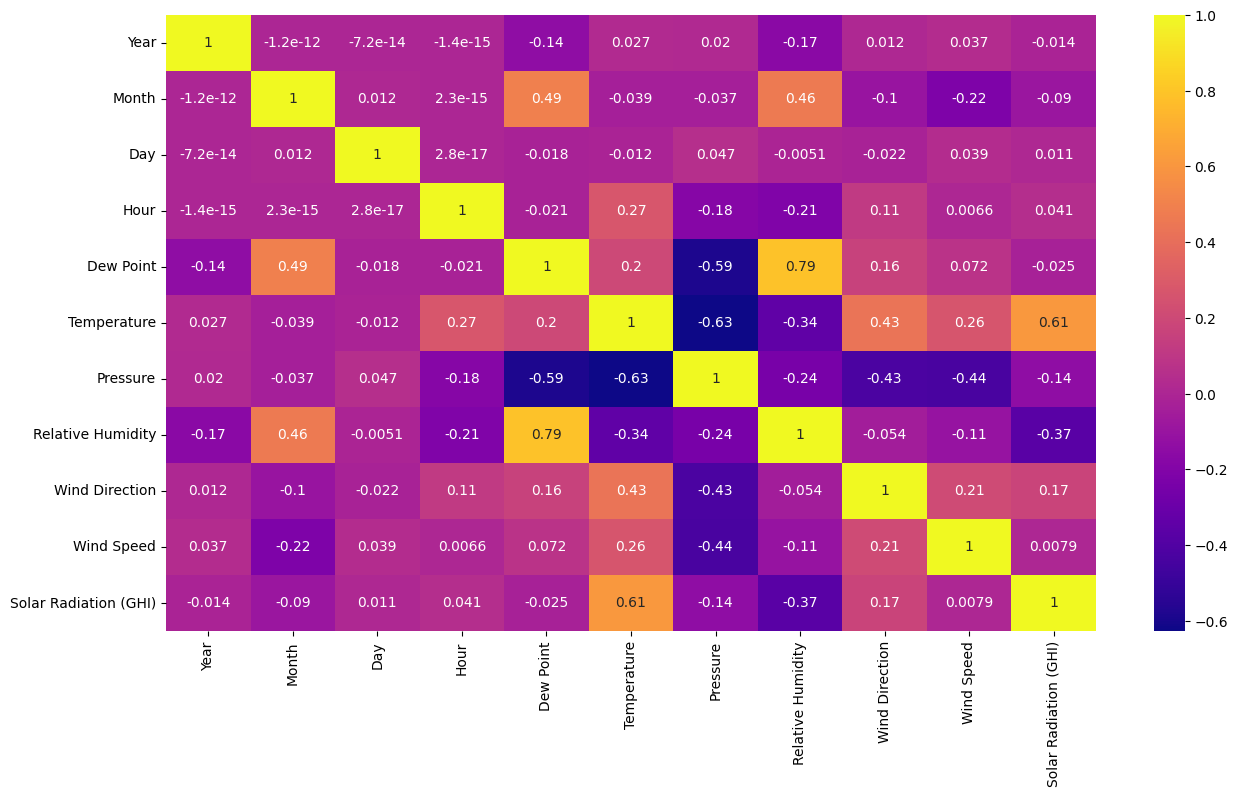

In [15]:
figure = plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True, cmap = 'plasma')
plt.show()

In [16]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
etc.fit(X,y)

ExtraTreeClassifier()

In [17]:
etc.feature_importances_

array([0.03298153, 0.05738607, 0.11931975, 0.09541309, 0.09481072,
       0.12905826, 0.11799939, 0.11688993, 0.11789318, 0.11824807])

In [18]:
X

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
6,0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
7,0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
8,0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
9,0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
10,0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046
...,...,...,...,...,...,...,...,...,...,...
17510,1,1.0,1.0,0.666667,0.363636,0.406748,0.661102,0.095294,0.015946,0.249092
17511,1,1.0,1.0,0.750000,0.345455,0.374816,0.654829,0.104142,0.023550,0.262867
17512,1,1.0,1.0,0.833333,0.381818,0.316482,0.661057,0.141926,0.048566,0.297785
17513,1,1.0,1.0,0.916667,0.418182,0.247227,0.664845,0.208352,0.081641,0.364545


In [19]:
y

6          0
7          0
8        159
9        363
10       533
        ... 
17510    553
17511    408
17512    221
17513     16
17514      0
Name: Solar Radiation (GHI), Length: 9490, dtype: int64

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kBest = SelectKBest(score_func=chi2, k = 10).fit(X,y)

In [21]:
kBest.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [22]:
values = pd.Series(kBest.scores_, index=X.columns) # type: ignore

In [23]:
print(values)

Year                 504.976721
Month                236.303859
Day                  208.497847
Hour                 271.978728
Dew Point             74.952667
Temperature          306.062548
Pressure             213.040872
Relative Humidity    397.828591
Wind Direction       221.823327
Wind Speed           148.735716
dtype: float64


In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=5)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=5)

In [25]:
kmeans.cluster_centers_

array([[0.        , 0.77025421, 0.50809785, 0.47638127, 0.85878609,
        0.47826222, 0.51238373, 0.64547288, 0.50853105, 0.27530021],
       [1.        , 0.90885334, 0.53432056, 0.50515389, 0.66824517,
        0.43603904, 0.71981201, 0.38069332, 0.35993067, 0.22322729],
       [1.        , 0.59139151, 0.47085299, 0.48324489, 0.90473842,
        0.60140131, 0.31984049, 0.56757798, 0.63083968, 0.39486108],
       [0.        , 0.3160625 , 0.50176293, 0.61621434, 0.67539698,
        0.67904248, 0.41094423, 0.22819744, 0.74950775, 0.43114005],
       [1.        , 0.17746641, 0.482027  , 0.51183588, 0.49596863,
        0.52528108, 0.60721527, 0.17463283, 0.56411173, 0.34563893],
       [0.        , 0.11021636, 0.42963358, 0.38153682, 0.54205879,
        0.38905682, 0.72162849, 0.30103712, 0.25781888, 0.26669911]])

In [26]:
kmeans.labels_

array([5, 5, 5, ..., 1, 1, 1], dtype=int32)

In [27]:
kmeans.cluster_centers_

array([[0.        , 0.77025421, 0.50809785, 0.47638127, 0.85878609,
        0.47826222, 0.51238373, 0.64547288, 0.50853105, 0.27530021],
       [1.        , 0.90885334, 0.53432056, 0.50515389, 0.66824517,
        0.43603904, 0.71981201, 0.38069332, 0.35993067, 0.22322729],
       [1.        , 0.59139151, 0.47085299, 0.48324489, 0.90473842,
        0.60140131, 0.31984049, 0.56757798, 0.63083968, 0.39486108],
       [0.        , 0.3160625 , 0.50176293, 0.61621434, 0.67539698,
        0.67904248, 0.41094423, 0.22819744, 0.74950775, 0.43114005],
       [1.        , 0.17746641, 0.482027  , 0.51183588, 0.49596863,
        0.52528108, 0.60721527, 0.17463283, 0.56411173, 0.34563893],
       [0.        , 0.11021636, 0.42963358, 0.38153682, 0.54205879,
        0.38905682, 0.72162849, 0.30103712, 0.25781888, 0.26669911]])

# PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vals = pca.fit_transform(X)
vals2 = pca.fit_transform(kmeans.cluster_centers_)

In [29]:
vals

array([[-0.49693961, -0.22330391],
       [-0.48971636, -0.26107487],
       [-0.47450949, -0.3267928 ],
       ...,
       [ 0.536982  ,  0.11965034],
       [ 0.52476972,  0.15159621],
       [ 0.52901242,  0.12370362]])

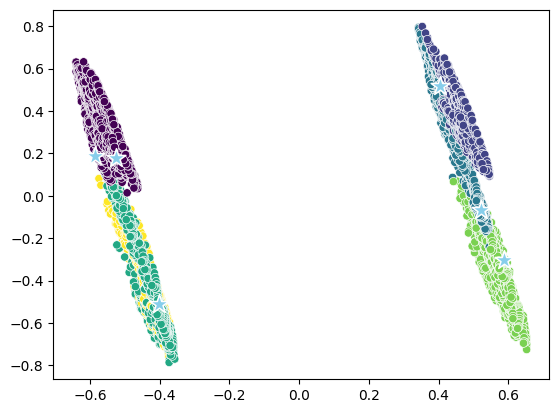

In [30]:
sns.scatterplot(x = vals[:, 0], y = vals[:, 1], c = kmeans.labels_)
sns.scatterplot(x = vals2[:,0], y = vals2[:,1], marker = '*', s= 200, c = 'skyblue')
plt.show()